   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

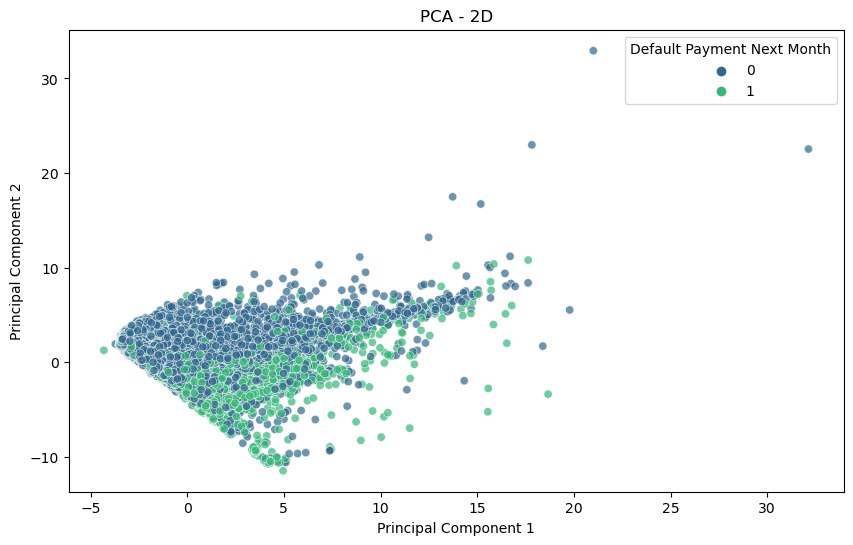

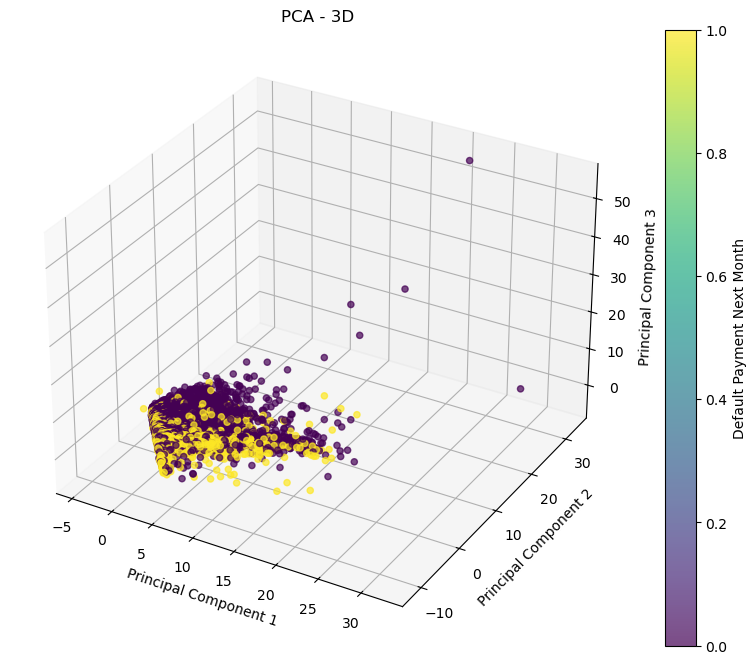

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


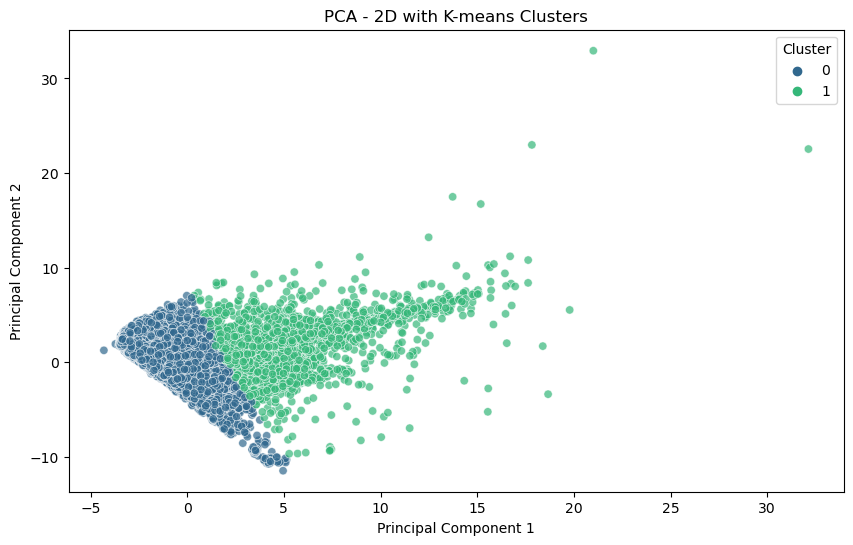

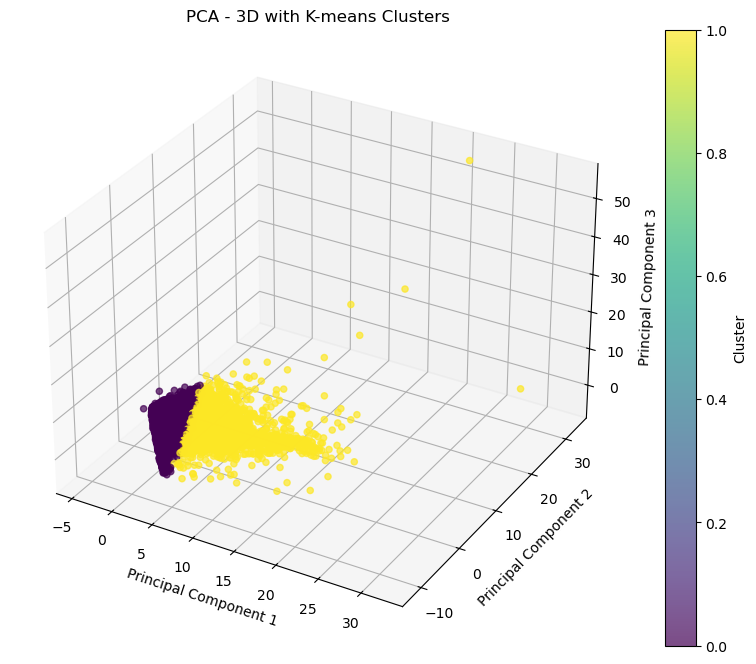

In [1]:
#This activity is meant to explore the results of applying PCA to a dataset.
#A dataset from a credit card company is provided. This dataset contains customer data pertaining to demographic and payment information as well as basic demographics. 
#The final column default payment next month is what we want to create profiles for.

#Using the provided Jupyter Notebook and data set (ZIP) Links to an external site., use PCA and reduce the dimensionality of the data to 2 and 3 dimensions. 
#Then, draw scatterplots of the resulting data and color them by default. Does it seem that 2 or 3 principal components will separate the data into clear groups? Why or why not? 

#You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity. 
                                                                                                                                            
#(Note: In this assignment, you should use the scikit-learn version of PCA.)

#This is a required discussion and counts toward program completion.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/credit.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values if necessary (for simplicity, dropping rows with missing values)
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=['default.payment.next.month'])
y = data['default.payment.next.month']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Apply PCA to reduce to 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create a DataFrame for the 2D PCA results
df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['default'] = y

# Create a scatterplot for 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='default', data=df_pca_2d, palette='viridis', alpha=0.7)
plt.title('PCA - 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Default Payment Next Month')
plt.show()

# Create a DataFrame for the 3D PCA results
df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['default'] = y

# Create a scatterplot for 3D PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['default'], cmap='viridis', alpha=0.7)
plt.title('PCA - 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, label='Default Payment Next Month')
plt.show()

# Apply K-means clustering with 2 clusters (since we are interested in 'default' and 'no default')
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the PCA DataFrames
df_pca_2d['cluster'] = clusters
df_pca_3d['cluster'] = clusters

# Create a scatterplot for 2D PCA with K-means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca_2d, palette='viridis', alpha=0.7)
plt.title('PCA - 2D with K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Create a scatterplot for 3D PCA with K-means clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA - 3D with K-means Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, label='Cluster')
plt.show()
